# Introduction

**Contents:**

1. Introduces the `GEModelTools`
1. Solves and simulates a simple **Heterogenous Agent Neo-Classical (HANC) model**

In [53]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from HANCModel_exc import HANCModelExcClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Setup

In [54]:
model = HANCModelExcClass(name='baseline') # create an instance of the model

In [55]:
par = model.par
ss = model.ss

**Pause:** Take a look at `.par` and `.ss`

In [56]:
par

namespace(Nfix=1,
          Nz=7,
          beta=0.96,
          sigma=2.0,
          rho_z=0.96,
          sigma_psi=0.1,
          a_max=100.0,
          Na=500,
          max_iter_solve=50000,
          max_iter_simulate=50000,
          tol_solve=1e-12,
          tol_simulate=1e-12,
          T=500,
          simT=1000,
          max_iter_broyden=100,
          tol_broyden=1e-10,
          a_grid=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                        0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [57]:
ss

namespace(a=array([[[0., 0., 0., ..., 0., 0., 0.],
                    [0., 0., 0., ..., 0., 0., 0.],
                    [0., 0., 0., ..., 0., 0., 0.],
                    ...,
                    [0., 0., 0., ..., 0., 0., 0.],
                    [0., 0., 0., ..., 0., 0., 0.],
                    [0., 0., 0., ..., 0., 0., 0.]]]),
          c=array([[[0., 0., 0., ..., 0., 0., 0.],
                    [0., 0., 0., ..., 0., 0., 0.],
                    [0., 0., 0., ..., 0., 0., 0.],
                    ...,
                    [0., 0., 0., ..., 0., 0., 0.],
                    [0., 0., 0., ..., 0., 0., 0.],
                    [0., 0., 0., ..., 0., 0., 0.]]]),
          u=array([[[0., 0., 0., ..., 0., 0., 0.],
                    [0., 0., 0., ..., 0., 0., 0.],
                    [0., 0., 0., ..., 0., 0., 0.],
                    ...,
                    [0., 0., 0., ..., 0., 0., 0.],
                    [0., 0., 0., ..., 0., 0., 0.],
                    [0., 0., 0., ..., 0., 0., 0.]]])

# Find stationary equilibrium

## Direct approach

In [58]:
model.find_ss(tau=0.001,do_print=True,r_min=1e-8)

### step 1: broad search ###

household problem in ss solved in 4.1 secs [223 iterations]
household problem in ss simulated in 1.1 secs [225 iterations]
clearing_B = -99999.82671551

household problem in ss solved in 0.2 secs [249 iterations]
household problem in ss simulated in 0.0 secs [263 iterations]
clearing_B =   0.04328562

household problem in ss solved in 0.2 secs [279 iterations]
household problem in ss simulated in 0.0 secs [312 iterations]
clearing_B =   0.30000573

household problem in ss solved in 0.2 secs [315 iterations]
household problem in ss simulated in 0.0 secs [379 iterations]
clearing_B =   0.55887530

household problem in ss solved in 0.3 secs [359 iterations]
household problem in ss simulated in 0.0 secs [470 iterations]
clearing_B =   0.92682552

household problem in ss solved in 0.3 secs [411 iterations]
household problem in ss simulated in 0.1 secs [615 iterations]
clearing_B =   1.51681677

household problem in ss solved in 0.3 secs [474 iterations]
househo

**Look at the steady state variables:**

In [59]:
for varname in model.varlist:
    print(f'{varname:15s}: {ss.__dict__[varname]:.4f}')

B              : 0.2550
r              : 0.0039
tau            : 0.0010
A_hh           : 0.2550
C_hh           : 1.0000
U_hh           : -1.1310
clearing_B     : 0.0000


## Optimal tax level

In [69]:
def target(tau):
    
    model.find_ss(tau) 
    return -ss.U_hh
    
res = optimize.minimize_scalar(target,bounds=(0.0,0.1),method='bounded',options={'disp':3})

 
 Func-count     x          f(x)          Procedure
    1      0.0381966      1.12765        initial
    2      0.0618034      1.12916        golden
    3      0.0236068      1.12743        golden
    4      0.0252331      1.12741        parabolic
    5      0.0272096      1.12741        parabolic
    6       0.026714      1.12741        parabolic
    7       0.026747      1.12741        parabolic
    8      0.0267375      1.12741        parabolic
    9      0.0267342      1.12741        parabolic
   10      0.0267408      1.12741        parabolic

Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  1e-05 )


In [71]:
model_opt = model.copy(name='model_copy')

In [74]:
model_opt.find_ss(tau=res.x)

**Look at the steady state variables:**

In [76]:
for varname in model_opt.varlist:
    print(f'{varname:15s}: {ss.__dict__[varname]:.4f}')

B              : 1.2925
r              : 0.0207
tau            : 0.0267
A_hh           : 1.2925
C_hh           : 1.0000
U_hh           : -1.1274
clearing_B     : 0.0000


*Varying tau:*

In [93]:
tau_vec = []
tau_vec = np.append(tau_vec,np.linspace(0.0,0.04,9))
tau_vec = np.append(tau_vec,np.linspace(0.05,0.1,3))

U_hh = np.zeros(len(tau_vec))
r = np.zeros(len(tau_vec))
B = np.zeros(len(tau_vec))

for i,tau_i in enumerate(tau_vec):
    model.find_ss(tau=tau_i,do_print=False)
    
    print(f'tau  =  {tau_i:3.4f}')
    print(f'U_hh = {ss.U_hh:3.4f}')
    print(f'B    =  {ss.B:3.4f}')
    print(f'r    =  {ss.r:3.4f}\n')
    
    U_hh[i] = ss.U_hh
    B[i] = ss.B
    r[i] = ss.r

tau  =  0.0000
U_hh = -1.1320
B    =  0.1735
r    =  0.0000

tau  =  0.0050
U_hh = -1.1293
B    =  0.4780
r    =  0.0105

tau  =  0.0100
U_hh = -1.1283
B    =  0.6955
r    =  0.0144

tau  =  0.0150
U_hh = -1.1278
B    =  0.8875
r    =  0.0169

tau  =  0.0200
U_hh = -1.1275
B    =  1.0660
r    =  0.0188

tau  =  0.0250
U_hh = -1.1274
B    =  1.2353
r    =  0.0202

tau  =  0.0300
U_hh = -1.1274
B    =  1.3979
r    =  0.0215

tau  =  0.0350
U_hh = -1.1275
B    =  1.5553
r    =  0.0225

tau  =  0.0400
U_hh = -1.1277
B    =  1.7085
r    =  0.0234

tau  =  0.0500
U_hh = -1.1283
B    =  2.0052
r    =  0.0249

tau  =  0.0750
U_hh = -1.1304
B    =  2.7077
r    =  0.0277

tau  =  0.1000
U_hh = -1.1332
B    =  3.3741
r    =  0.0296



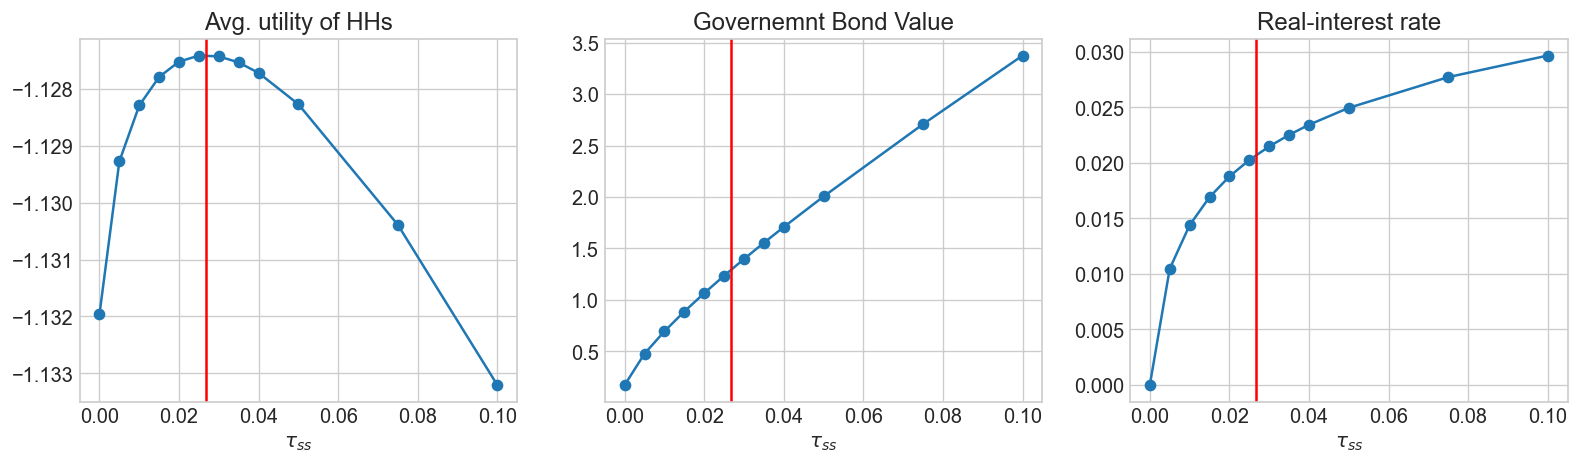

In [106]:
fig = plt.figure(figsize=(16,4),dpi=120)

ax = fig.add_subplot(1,3,1) 
ax.plot(tau_vec, U_hh, marker='o')
ax.axvline(res.x,color='red')
ax.set_xlabel('$\\tau_{ss}$')
ax.set_title('Avg. utility of HHs'); 

ax = fig.add_subplot(1,3,2) 
ax.plot(tau_vec, B, marker='o')
ax.axvline(res.x,color='red')
ax.set_xlabel('$\\tau_{ss}$')
ax.set_title('Governemnt Bond Value'); 

ax = fig.add_subplot(1,3,3) 
ax.plot(tau_vec, r, marker='o')
ax.axvline(res.x,color='red')
ax.set_xlabel('$\\tau_{ss}$')
ax.set_title('Real-interest rate'); 

## Looking at the stationary equilibrium

### Policy functions

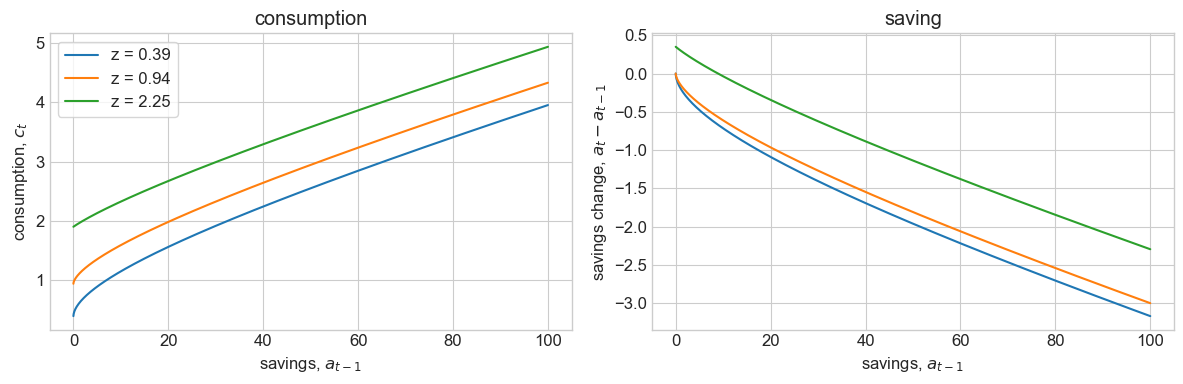

In [23]:
fig = plt.figure(figsize=(12,4),dpi=100)

I = par.a_grid < 500

# a. consumption
ax = fig.add_subplot(1,2,1)
ax.set_title(f'consumption')

for i_z,z in enumerate(par.z_grid):
    if i_z%3 == 0 or i_z == par.Nz-1:
        ax.plot(par.a_grid[I],ss.c[0,i_z,I],label=f'z = {z:.2f}')

ax.legend(frameon=True)
ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('consumption, $c_t$')

# b. saving
ax = fig.add_subplot(1,2,2)
ax.set_title(f'saving')

for i_z,z in enumerate(par.z_grid):
    if i_z%3 == 0 or i_z == par.Nz-1:
        ax.plot(par.a_grid[I],ss.a[0,i_z,I]-par.a_grid[I],label=f'z = {z:.2f}')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('savings change, $a_{t}-a_{t-1}$')

fig.tight_layout()

### Distributions

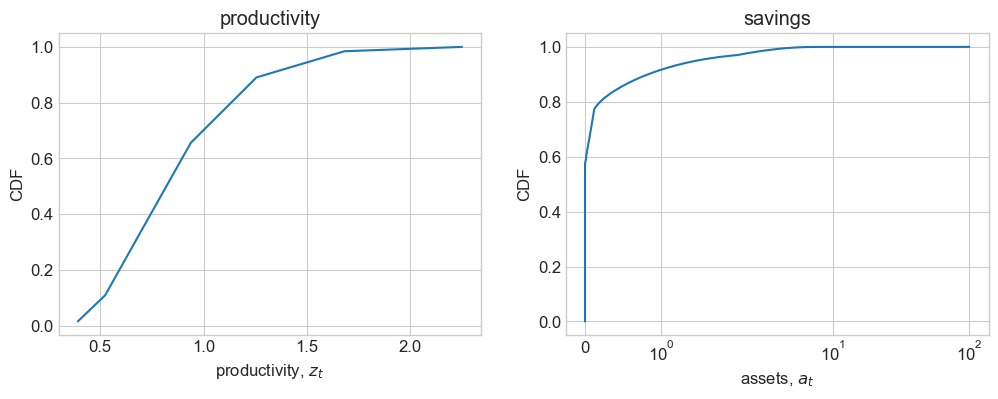

In [24]:
fig = plt.figure(figsize=(12,4),dpi=100)

# a. income
ax = fig.add_subplot(1,2,1)
ax.set_title('productivity')
ax.plot(par.z_grid,np.cumsum(np.sum(ss.D,axis=(0,2))))

ax.set_xlabel('productivity, $z_{t}$')
ax.set_ylabel('CDF')

# b. assets
ax = fig.add_subplot(1,2,2)
ax.set_title('savings')
ax.plot(np.insert(par.a_grid,0,par.a_grid[0]),np.insert(np.cumsum(np.sum(ss.D,axis=(0,1))),0,0.0),label='discrete')
ax.set_xlabel('assets, $a_{t}$')
ax.set_ylabel('CDF')
ax.set_xscale('symlog')

**Income moments:**

In [25]:
mean_z = np.sum(ss.D*par.z_grid[:,np.newaxis])
std_z = np.sqrt(np.sum(ss.D*(par.z_grid[np.newaxis,:,np.newaxis]-mean_z)**2))
print(f'mean z: {mean_z:5.2f}')
print(f'std. z: {std_z:5.2f}')

mean z:  1.00
std. z:  0.36


**Asset moments:**

In [26]:
# a. prepare
Da = np.sum(ss.D,axis=(0,1))
Da_cs = np.cumsum(Da)
mean_a = np.sum(Da*par.a_grid)
std_a = np.sqrt(np.sum(Da*(par.a_grid-mean_a)**2))

def percentile(par,Da_cs,p):
    
    # a. check first
    if p < Da_cs[0]: return par.a_grid[0]
    
    # b. find with loop
    i = 0
    while True:
        if p > Da_cs[i+1]:
            if i+1 >= par.Na: raise Exception()
            i += 1
            continue
        else:
            w = (p-Da_cs[i])/(Da_cs[i+1]-Da_cs[i])
            diff = par.a_grid[i+1]-par.a_grid[i]
            return par.a_grid[i]+w*diff
        
p25_a = percentile(par,Da_cs,0.25)
p50_a = percentile(par,Da_cs,0.50)
p95_a = percentile(par,Da_cs,0.95)
p99_a = percentile(par,Da_cs,0.99)

# b. print
print(f'mean a: {mean_a:6.3f}')
print(f'p25  a: {p25_a:6.3f}')
print(f'p50  a: {p50_a:6.3f}')
print(f'p95  a: {p95_a:6.3f}')
print(f'p99  a: {p99_a:6.3f}')
print(f'std. a: {std_a:6.3f}')

mean a:  0.255
p25  a:  0.000
p50  a:  0.000
p95  a:  1.469
p99  a:  3.586
std. a:  0.682


**MPC:**

In [27]:
def calc_MPC(par,ss):
    
    MPC = np.zeros(ss.D.shape)
    dc = (ss.c[:,:,1:]-ss.c[:,:,:-1])
    dm = (1+model.ss.r)*par.a_grid[np.newaxis,np.newaxis,1:]-(1+model.ss.r)*par.a_grid[np.newaxis,np.newaxis,:-1]
    MPC[:,:,:-1] = dc/dm
    MPC[:,:,-1] = MPC[:,:,-1] # assuming constant MPC at end
    mean_MPC = np.sum(MPC*ss.D)
    return mean_MPC

mean_MPC = calc_MPC(par,ss)
print(f'mean MPC: {mean_MPC:.3f}')

mean MPC: 0.627


# Idiosyncratic risk and the steady state interest rate

In [32]:
print(f'ss.A_hh = ss.K = {ss.A_hh:.2f}')
print(f'ss.r = {ss.r*100:.2f} %')
print('')
      
    
sigma_psi_plot = []
r_plot = []
    
for sigma_psi in np.linspace(par.sigma_psi,2*par.sigma_psi,5):
    
    print(f'{sigma_psi = :.2f}')

    model_ = model.copy()
    model_.par.sigma_psi = sigma_psi
        
    model_.solve_hh_ss(do_print=False)
    model_.simulate_hh_ss(do_print=False)
    
    A_hh = np.sum(model_.ss.a*model_.ss.D)
    
    print(f'PE {A_hh = :.2f}')
          
    model_.find_ss(ss.tau)

    print(f'GE ss.r = {model_.ss.r*100:.2f} %')
    print(f'GE ss.A_hh = ss.K = {model_.ss.A_hh:.2f}')

    print('')
    
    sigma_psi_plot = np.append(sigma_psi_plot,sigma_psi)
    r_plot = np.append(r_plot,model_.ss.r)
    

ss.A_hh = ss.K = 0.25
ss.r = 0.39 %

sigma_psi = 0.10
PE A_hh = 0.25
GE ss.r = 0.39 %
GE ss.A_hh = ss.K = 0.25

sigma_psi = 0.12
PE A_hh = 0.79
GE ss.r = 0.15 %
GE ss.A_hh = ss.K = 0.67

sigma_psi = 0.15
PE A_hh = 1.68
GE ss.r = 0.07 %
GE ss.A_hh = ss.K = 1.40

sigma_psi = 0.18
PE A_hh = 2.89
GE ss.r = 0.04 %
GE ss.A_hh = ss.K = 2.44

sigma_psi = 0.20
PE A_hh = 4.33
GE ss.r = 0.03 %
GE ss.A_hh = ss.K = 3.72




 [0.1   0.125 0.15  0.175 0.2  ] 
 [0.00392209 0.00149931 0.00071331 0.00040967 0.00026893]


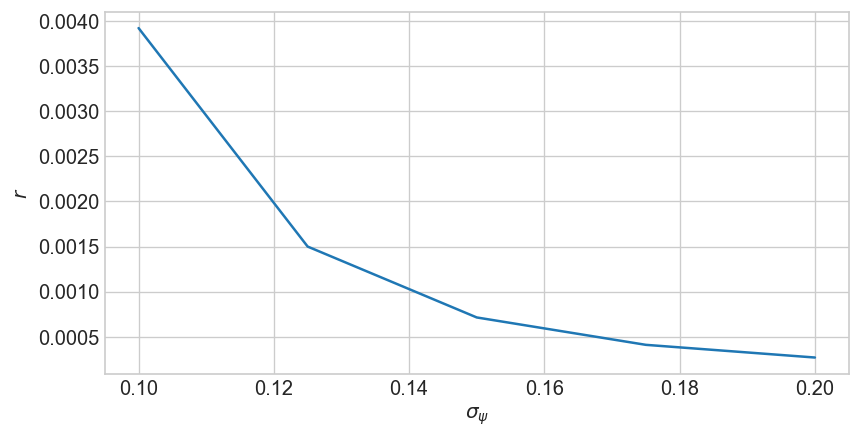

In [35]:
# arrays for plotting std. of inc. shocks and GE r.
print('\n',sigma_psi_plot,'\n',r_plot)

fig = plt.figure(figsize=(8,4),dpi=120) 
ax = fig.add_subplot(1,1,1) 
ax.plot(sigma_psi_plot,r_plot)
ax.set_xlabel('$\sigma_{\psi}$')
ax.set_ylabel('$r$');

# Calibration

In [19]:
from root_finding import brentq

In [20]:
def calib_obj(beta,model):
    """ calibration objective """
    
    model.par.beta = beta
    model.find_ss(method='direct')    
    
    mean_MPC = calc_MPC(model.par,model.ss)
     
    return mean_MPC-0.20

In [21]:
model_calib = model.copy()
brentq(calib_obj,0.94,par.beta,args=(model_calib,),do_print=True,varname='beta',funcname='MPC-0.20');

  0: beta =   0.94198455 -> MPC-0.20 =   0.00011745
  1: beta =   0.94208540 -> MPC-0.20 =   0.00000007
  2: beta =   0.94208546 -> MPC-0.20 =   0.00000000
  3: beta =   0.94208547 -> MPC-0.20 =  -0.00000001

beta =   0.94208546 [MPC-0.20 =   0.00000000]



In [22]:
print(f'ss.r = {model_calib.ss.r*100:.2f} %')
print(f'ss.K = {model_calib.ss.K:.2f}')

ss.r = 4.92 %
ss.K = 3.96


**Question:** What could be an alternative be to use a root-finder?

# In-class exercise

1. Look at the code and talk about it with the person next to you for 5 minutes
2. Write at least one question on https://padlet.com/jeppe_druedahl/advmacrohet

# Extra: Demand vs. supply of capital

In [23]:
# allocate
Nr_ss = 20
r_ss_min = ss.r-0.02
r_ss_max = ss.r+0.01
r_ss_vec = np.linspace(r_ss_min,r_ss_max,Nr_ss)

K_hh_supply = np.zeros(Nr_ss)
K_firm_demand = np.zeros(Nr_ss)

# calculate
for i,r_ss in enumerate(r_ss_vec):
    
    print(f'{r_ss = :7.4f}')
          
    model_ = model.copy()
    model_.ss.r = r_ss
    
    # a. firms
    K_firm_demand[i] = ((r_ss+par.delta)/par.alpha*ss.Gamma)**(1/(par.alpha-1))
    print(f'K_firm_demand = {K_firm_demand[i]:7.2f}')
    
    model_.ss.w = (1.0-par.alpha)*ss.Gamma*(K_firm_demand[i]/ss.L)**par.alpha
                
    # b. households
    model_.solve_hh_ss(do_print=True)
    model_.simulate_hh_ss(do_print=True)
    
    K_hh_supply[i] = np.sum(model_.ss.a*model_.ss.D)
    print(f'K_hh_supply = {K_hh_supply[i]:7.2f}')
          
    # c. clearing
    clearing_A = K_hh_supply[i]-K_firm_demand[i]
    print(f'{clearing_A = :7.2f}\n')
    

r_ss =  0.0107
K_firm_demand =    6.32
household problem in ss solved in 0.2 secs [295 iterations]
household problem in ss simulated in 0.0 secs [336 iterations]
K_hh_supply =    0.61
clearing_A =   -5.71

r_ss =  0.0122
K_firm_demand =    6.18
household problem in ss solved in 0.2 secs [308 iterations]
household problem in ss simulated in 0.0 secs [360 iterations]
K_hh_supply =    0.70
clearing_A =   -5.48

r_ss =  0.0138
K_firm_demand =    6.05
household problem in ss solved in 0.2 secs [321 iterations]
household problem in ss simulated in 0.0 secs [387 iterations]
K_hh_supply =    0.81
clearing_A =   -5.23

r_ss =  0.0154
K_firm_demand =    5.92
household problem in ss solved in 0.2 secs [336 iterations]
household problem in ss simulated in 0.0 secs [418 iterations]
K_hh_supply =    0.94
clearing_A =   -4.97

r_ss =  0.0170
K_firm_demand =    5.79
household problem in ss solved in 0.2 secs [352 iterations]
household problem in ss simulated in 0.0 secs [453 iterations]
K_hh_supply = 

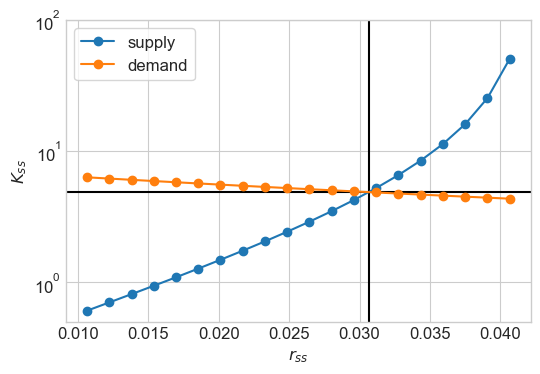

In [24]:
fig = plt.figure(figsize=(6,6/1.5),dpi=100)
ax = fig.add_subplot(1,1,1)

ax.axvline(ss.r,color='black')
ax.axhline(ss.K,color='black')

ax.plot(r_ss_vec,K_hh_supply,'-o',label='supply')
ax.plot(r_ss_vec,K_firm_demand,'-o',label='demand')

ax.set_xlabel('$r_{ss}$')
ax.set_ylabel('$K_{ss}$')
ax.set_ylim([0.5,100])
ax.set_yscale('log')
ax.legend(frameon=True);